# Import Modules

In [9]:
import pandas as pd

import utils

# Load Data

In [7]:
target_vegetable = "だいこん"

In [8]:
train = pd.read_csv("train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_x, train_y, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=4000, T=10)

# Training

In [4]:
pred_y = utils.pipeline_rnn(train_x, train_y, train, test, test_y, num_epochs=100)

training loss = 0.998563826084137
test loss = 0.6855627298355103
training loss = 0.42496347427368164
test loss = 0.6835618615150452
training loss = 0.22540833055973053
test loss = 3.099762439727783
training loss = 0.20601823925971985
test loss = 0.6010313630104065
training loss = 0.2011488825082779
test loss = 0.5484795570373535
training loss = 0.20802336931228638
test loss = 0.5166884064674377
training loss = 0.2083882987499237
test loss = 0.4951971471309662
training loss = 0.20010244846343994
test loss = 0.6368163228034973
training loss = 0.19682727754116058
test loss = 0.4995691180229187
training loss = 0.19595253467559814
test loss = 0.5052236914634705


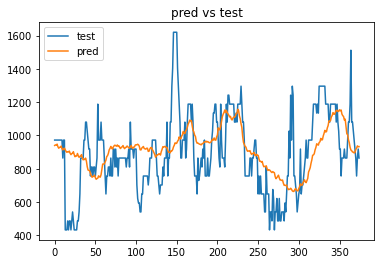

In [6]:
utils.plot_prediction(pred_y, test_y, ss)